# Python Review Crash Course - Part III

## Numpy, Scipy and Matplotlib

Prepared by Shing Chi Leung in Jan 2023 😀

Based on the course structure developed by Andrea Dziubek

## Numpy

Finally we come to the major topic in using Python for scientific computing. In this chapter we will look into greater details in some of the common methods for matrix operation. Numpy is useful because it is the counterpart of BLAS and LAPACK in Fortran. They include

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* basic linear algebra functions
* basic Fourier transforms
* sophisticated random number capabilities
* tools for integrating Fortran code
* tools for integrating C/C++ code

> https://numpy.org/    
> https://scipy.org/

In the last lecture, we have discussed how to use it to make an array and how basic operations (e.g., matrix multiplication) are done. 

### Numpy array generation

We need to import numpy so that we may call the specific functions directly.

In [1]:
import numpy as np

We have already talked about how basic array can be built, this includes:

In [15]:
# Converting from a list
a = np.array([[1, 2, 3], [4, 5, 6]])

# Using the default methods
b = np.zeros((2, 3))
c = np.ones((2,3))

# special method for an integer array 
# similar to range
d = np.arange(2, 9, 2)
e = np.arange(2, 9, 2, dtype=float)

# special method for floating var array
f = np.linspace(0,1,5)

In [16]:
print("{}\n".format(a))
print("{}\n".format(b))
print("{}\n".format(c))
print("{}\n".format(d))
print("{}\n".format(e))
print("{}\n".format(f))

[[1 2 3]
 [4 5 6]]

[[0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]]

[2 4 6 8]

[2. 4. 6. 8.]

[0.   0.25 0.5  0.75 1.  ]



Once we have an array, we can morph the shape of the array while keeping the total number of elements to be the same by the method *reshape*

In [13]:
# converting a 2-row-3-column array into a 3-row-2-column array
a2 = a.reshape((3,2))
print(a2)

[[1 2]
 [3 4]
 [5 6]]


We may notice that the transpose is different from reshape in terms of the element order.

In [14]:
print(a.T)

[[1 4]
 [2 5]
 [3 6]]


**Reference**:
> https://numpy.org/doc/stable/reference/routines.array-creation.html

### Shape of the array

We recapitulate that we may use the attribute *shape* to check the dimension of the array, and *[i,j,...]* to refer to individual elements in a matrix

In [17]:
# Shape of the array

print(a.shape)
print(e.shape)
print(f.shape)

(2, 3)
(4,)
(5,)


We also emphasize that the matrices *e* and *f* are column vector.

In [20]:
# individual elements of the matrix

# single elements
print("{}\n".format(a[0,2]))

# slices
print("{}\n".format(a[:,0:2]))

# slices with reversed order
print("{}\n".format(a[::-1,:]))

3

[[1 2]
 [4 5]]

[[4 5 6]
 [1 2 3]]



### Dot (scalar) product and cross (vector) product

We use the method `dot` and `cross` to do the two products.

In [23]:
g = np.array([1,2,3])

g_dot = np.dot(g, g)
g_cross = np.outer(g, g)

print("dot product: {}".format(g_dot))
print("cross product: \n{}".format(g_cross))

dot product: 14
cross product: 
[[1 2 3]
 [2 4 6]
 [3 6 9]]


### Inverse of a matrix

We use the package `linalg` inside Numpy and the `inv` method in that package to find the inverse of a matrix. 

In [26]:
g = np.array([[1,2],[3,4]])

g_inv = np.linalg.inv(g)
print("inverse of g: \n{}".format(g_inv))

inverse of g: 
[[-2.   1. ]
 [ 1.5 -0.5]]


### Exercise 1

Can you check if `g_inv` is indeed the inverse of `g`?

### Output a matrix in a text file

From time to time we may want to output the results to a text file so that we may further present it or use it in other codes. To do so, we use the method  `savetxt` and `loadtxt`:

In [28]:
g = np.array([[1,2],[3,4]])

np.savetxt("g.txt", g)
g_loaded = np.loadtxt("g.txt")

print(g_loaded)

[[1. 2.]
 [3. 4.]]


### Exercise 2

Create a matrix $B = [[5,6],[7,8]]$ and then output it to a file, and then read it to another matrix, let's call it $C$, and check if the matrices are the same.

**Reference**: 
    
- https://numpy.org/doc/stable/reference/routines.io.html

### Eigenvalue and Concatenuating row array

In finding the eigenvector, we need to patch the eigenvectors side by side to form a matrix. For example, consider the matrix

$ A = 
\left(\begin{array}{cc} 
1 & 2\\
3 & 4
\end{array}\right)
$ 

We want to find the eigenvalue and eigenvectors. We may use the method `eig` in the `linalg` package to find. Then we can create the square array of eigenvectors.

In [29]:
A = np.array([[1,2],[3,4]])

A_eig = np.linalg.eig(A)
print(A_eig)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


Apparently the variable `A_eig` stores the eigenvalues -0.3722 and 5.3723 and the two eigenvectors. How do we further use this results? Right now it looks like they are packed together. Indeed,

In [31]:
type(A_eig)

tuple

We need to call their element by the index. By inspection, the first elements is the array of the eignevalues. Remember that calling the elements in a tuple is the same as a list. The only difference between a tuple and a list is that a tuple is immutable. Thus, once it is there, all elements and the size of the tuple remain the same. The use of tuple is very extensive, especially where many Numpy functions return a bunch of results in the form of tuple. Thus we have

In [33]:
eig_val1 = A_eig[0][0]
eig_val2 = A_eig[0][1]
print("The two eigenvalues are {} and {}".format(eig_val1, eig_val2))

The two eigenvalues are -0.3722813232690143 and 5.372281323269014


By the same method we can use it to extract the eigenvectors. We will use the method `hstack` and `vstack` (depending on how we have defined the eigenvectors) to *stack* the vectors to form the transformation matrix. 

In [34]:
eig_vec1 = A_eig[1][0]
eig_vec2 = A_eig[1][1]
print(eig_vec1, eig_vec2)

[-0.82456484 -0.41597356] [ 0.56576746 -0.90937671]


In [45]:
Q = np.hstack((eig_vec1.reshape((2,1)), eig_vec2.T.reshape(2,1)))
Q

array([[-0.82456484,  0.56576746],
       [-0.41597356, -0.90937671]])

In [46]:
Q_inv = np.linalg.inv(Q)
Q_inv

array([[-0.92305231, -0.57427572],
       [ 0.42222915, -0.83696501]])

In [ ]:
np.matmul(np.matmul(Q_inv, Q)

### Exercise 3

Solve by hand the eigenvalue and eigenvector to double check the results. 

### Exercise 4

Now it is your turn to find the eigenvalues of the matrix 

$ B = 
\left(\begin{array}{cc} 
1 & 2\\
3 & 1
\end{array}\right)
$ 

Find the eigenvalues and eivenvectors. And then construct the diagonal matrix where the elements are the eigenvalues of $B$. Try not to directly copy and paste the code we have shown. 

### Documentation

It is impossible to cover all the methods in Numpy because it is such an extensive library which contains all basic operations in linear algebra, function transforms, data regression and so on. We refer interested readers to the official documents to explore other possibilities. 

> https://numpy.org/doc/stable/reference/index.html

### Exercise 5

By searching the documentation, find the determinant of the matrix $B$ defined above. 

## Difference between Numpy and Scipy

The two libraries have actually different functionality in the latest versions. The Numpy library is more aimed at solving and handling arrays in an efficient way, while Scipy aims at providing the algorithms for many operation beyond matrix, such as algebraic function, regression, solving polynomial and so on. Below we list the three major differences:

1. Numpy is written with C subroutines and Scipy is written in Python. Thus, for overlapping methods in both libraries, Numpy has a higher efficiency. 
2. Operation in Scipy does not limit to arrays. The data can be inhomogeneous (though not advised).
3. The definition and design of function in Scipy is more detailed than Numpy

**Reference**:

NumPy contains array data and basic operations such as sorting, indexing, etc whereas, SciPy consists of all the numerical code.
- https://www.scipy.org/scipylib/faq.html
- https://stackoverflow.com/questions/6200910/relationship-between-scipy-and-numpy

### Example, using linalg package for solving matrix (by Andrea)

Below we create a small $2 \times 2$ matrix $A$ and a column vector $b$ we solve for the root $x$ where $Ax = b$. 

In [49]:
import numpy as np
import scipy.linalg as la

A = np.array([[ 1, 2],
              [0,  1]])
b = np.array([0,1])

x = la.solve(A,b)


for i in ['A','x','A @ x','A.dot(x)']: 
    print(i,"=\n", eval(i),"\n")

A =
 [[1 2]
 [0 1]] 

x =
 [-2.  1.] 

A @ x =
 [0. 1.] 

A.dot(x) =
 [0. 1.] 



### Exercise 6

Check. Remember, b is a liner combination of the columns of A

### Performance comparison of Numpy and Scipy

Below we ask Numpy and Scipy to do the same task, i.e. to solve for the root. From this we try to demonstrate the difference in their computational time. 

What we do is to generate a large matrix $C$ and the column vector $y$, we try to solve $C x  = y$.

In [80]:
# Numpy's turn

# create a random square matrix C
C = np.random.randint(0, 10, (5000, 5000))

# create a random column matrix y
y = np.random.randint(-10, 10, (5000, 1))

In [81]:
import time

start_time = time.time()
C_np = np.linalg.solve(C, y)
print("Numpy takes {} s".format(time.time() - start_time))

Numpy takes 0.945504903793335 s


In [82]:
start_time = time.time()
C_sp = la.solve(C, y)
print("Scipy takes {} s".format(time.time() - start_time))

Scipy takes 1.208235740661621 s


If you are using very large matrix or need to repeat processes many times, if there is an option in using Numpy, Numpy is more preferred. 

### Exercise 7 (Code study by Andrea)

Study the code below. Why does Python raise the error? Do you know what goes wrong?

In [48]:
import scipy.linalg as la
print(np.ones((3,3)))
L = la.cholesky(np.ones((3,3)))
print(L)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


LinAlgError: 2-th leading minor of the array is not positive definite

## Matplotlib

The final topic we want to cover, so that you may do the first set of homework is the data visualization library, or the plotting library `matplotlib`. This library has a very long heritage which can be traced back to Python 2.0 (2003). There are also other new visualization tool like `seaborn`, or `express`. But Matpliblib is still the standard in terms of the coverage in the scientific publication (but less coverage if it goes to webpage development due to its lack of interactive graph). It has very rich customization which can respond to very different scenarios. 

We will focus on the `matplotlib.pyplot` package in this lecture. 

*Only for first time*

In case if your Python is very new, your Python library might not have installed the Matplotlib, then you may need to type
```
!pip install matplitlib
```
and execute it first. It might take some time because it is not a small library. 

In [1]:
# import the library as follows

import matplotlib.pyplot as plt

To plot some simple $x-y$ plot, we can simply use the `plot` method and pass the data of $x$ and $y$ accordingly. Let's try to plot the $y = 2x$ function from $x=1$ to 3. 

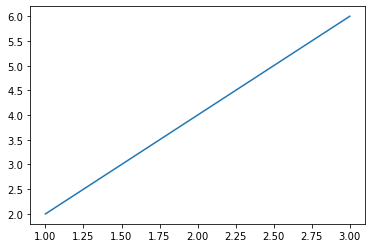

In [2]:
plt.plot([1,2,3], [2,4,6])

As long as we pass data structure like a 1D array or list, Matplotlib will align the data and show it in a graph. Certainly the above figure is very rough which we may need to decorate before we can publish it. Below we show more steps demonstrating how these can be done. 

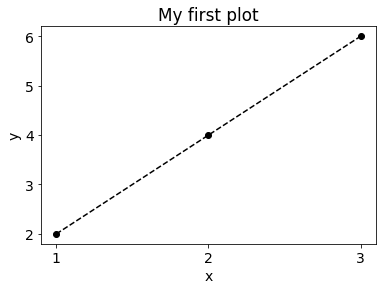

In [18]:
# plot the figure with dashed line and with circle to mark the data point
plt.plot([1,2,3], [2,4,6], "--o", c="black")

# change the axis label
plt.xlabel("x")
plt.ylabel("y")

# add the axis in the graph
plt.title("My first plot")

# change the ticks on the x-axis
plt.xticks([1,2,3])

# change the font size of the graph
plt.rcParams.update({"font.size":14})

Here we briefly summarize the common plotting style:
- solid line: "-"
- dashed line: "--"
- dotted line: ":"
- dot dashed line: "-."

The data point can be plotted in:
- circle: "o"
- square: "s"
- pentagon: "p"
- hexagon: "h"

You might notice that in the first line of the above example, we use `c="black"` to ask Matplotlib to plot the figure in black. This is because Python has a option as optional parameters, if you do not give any, Matplotlib will use the default value. In the above example, we see that the default colour is something blue. But if we pass any value into that function (method), our value will override the default value and it will be shown in the figure. 

### Exercise 8

Try to copy the above code to the block below and experiment with different plotting style. 

### Exercise 9

1. Use list comprehension to create two lists (or arrays if you want) of data that represents two functions $y_1 = x^2 + 2x + 3$, $y_2 = 2 \sin(x)$. In the domain $x \in (1,5)$
2. Plot the $y_1$ in red solid line, use the parameter "label" to pass the name of the line as $y_1$. 
3. Plot the $y_2$ in green dashed line, with data point shown as upper triangle. Again, use the parameter "label" to pass the name of the line as $y_2$, 
4. Add the x- and y-axis labels accordingly
5. Add a legend in the graph.

Certainly there are parts that are not fully covered in our examples. You may want to search in the documentation or stackoverflow to get some hints. 

In [ ]:
# create the data points for x (one line)


# create the data points for y1 (one line)


# create the data points for y2 (one line)


# plot y1 and y2 (two line), remember to add the line properties (two lines)



# update the x- and y-label (two lines)



# add the legend (one line)


The last example (by Andrea) and exercise to show in this lecture is the two-dimensinal colour plot, which is very useful to visualize the flow of the different equations. 

To do so, we need to use the concept of `figure` and `ax`. The class `figure` is the plotting space in general, and `ax` is the axis object which defined the plotting area. By doing so it gives us more flexibility to control the graph, especially the general outlook of the graph and when the graph has multiple plots. 

<ipython-input-27-136ba6f55ff7>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb = ax.pcolormesh(X, Y, f)


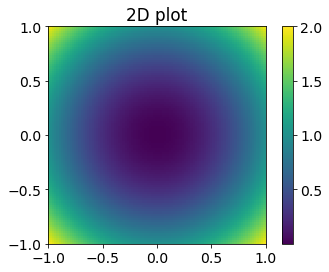

In [27]:
import numpy as np
# ploting 2d functions on regular meshes 
x = np.linspace(-1,1,100)   # start, end, how many
X,Y = np.meshgrid(x, x)

f = X**2 + Y**2  # f(x,y)

# set up a canva to draw
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the 2D color plot
ax.pcolormesh(X, Y, f)

# set the aspect of the graph
ax.set_aspect("equal")

# add a title 
ax.set_title("2D plot")

plt.show()

### Exercise 10

Plot a similar 2D graph for the function $f(x,y)=\cos(\pi x) \cos(\pi y)$ for $x \in (-1, 1)$. 
1. This time let us use another colour map `cmap` to be "winter". Where can we set it?
2. Add a color bar legend to let reader knows the mapping of value.

Again, this is a good chance to practice using documentation and stackoverflow.

In [ ]:
# define the range of x and y (two lines)



# build up the map for f (one line)



# create the figure object and then axis object (two lines)



# plot the 2D colour plot and also output the colour bar data
# with the setting of colour map (one line)


# use the colour data to add the colour bar legend (one line)


# output the graph (one line)


### Remark from Andrea

#### <font color='purple'> Make sure that you feel comfortable with numpy, scipy, matplotlib. You should be able to work on the first homework set. 

> Find information about certain routines in the [numpy reference](https://docs.scipy.org/doc/numpy/reference/), the [numpy user guide](https://docs.scipy.org/doc/numpy/user/), and the [scipy reference](https://docs.scipy.org/doc/scipy/reference/).
    
> Chapter 1 of the [scipy-lectures](http://www.scipy-lectures.org/) is geared towards engineers.

> Use the [matplotlob gallery](https://matplotlib.org/gallery/) as resource for images and source code.

> Ask us or [stackoverflow](https://stackoverflow.com) if you have a question. </font>


# This is the end of Lecture 3 :-)